In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle


In [2]:
df = pd.read_csv('../Data/clean_data.csv')

C:\Users\23769\AppData\Local\Temp\ipykernel_14040\640139256.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/clean_data.csv')


In [3]:
df.DESTINATION_AIRPORT.unique()

array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'BTR',
       'LAS', 'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW',
       'SAN', 'RIC', 'AUS', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP',
       'BUR', 'DAL', 'CVG', 'SMF', 'RDU', 'JMS', 'BNA', 'DSM', 'MAF',
       'BOI', 'ELP', 'TUS', 'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP',
       'MKE', 'JNU', 'CMH', 'CLD', 'KTN', 'CAK', 'CRP', 'CLE', 'GPT',
       'SHV', 'TYS', 'IND', 'LIT', 'SAT', 'SRQ', 'TUL', 'GRK', 'PNS',
       'BTV', 'CHS', 'DAY', 'OKC', 'SAV', 'XNA', 'COS', 'GJT', 'BZN',
       'PUB', 'HRL', 'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'GSO', 'VPS',
       'LAW', 'ACY', 'LBB', 'JAC', 'BIL', 'EUG', 'ASE', 'TVC', 'MTJ',
       'CAE', 'PVD',

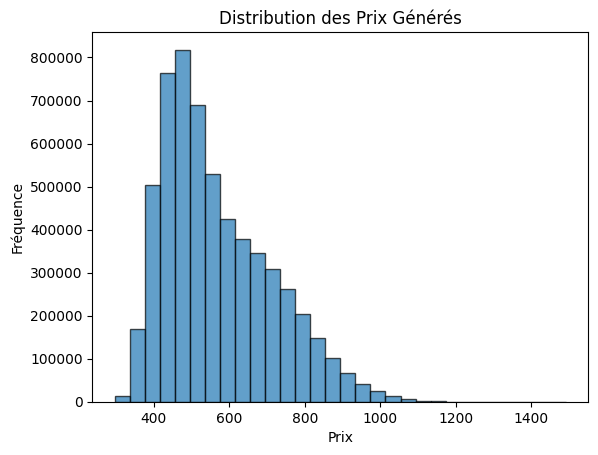

In [4]:
def generate_price(data):

    base_price = 200  # Prix de base imposer

    # Ajustement du prix selon la distance
    price = base_price + data['DISTANCE'] * 0.005 

    # Ajustement du prix selon le jour de la semaine
    if data['DAY_OF_WEEK'] in [5, 7]:  
        price = price + (price * 0.2) 

    # Ajustement du prix selon le mois (vacances)
    if data['MONTH'] in [6, 7, 8, 12]:  
        price = price + (price*0.5) 

    # Ajustements basés sur la compagnie aérienne
    airline = {
        'AA': np.random.uniform(0.10, 0.50), 'AS': np.random.uniform(0.10, 0.50), 'B6': np.random.uniform(0.10, 0.50), 'DL': np.random.uniform(0.10, 0.50), 'EV': np.random.uniform(0.10, 0.50), 'F9': np.random.uniform(0.10, 0.50),
        'HA': np.random.uniform(0.10, 0.50), 'MQ': np.random.uniform(0.10, 0.50), 'NK': np.random.uniform(0.10, 0.50), 'OO': np.random.uniform(0.10, 0.50), 'UA':np.random.uniform(0.10, 0.50), 'US': np.random.uniform(0.10, 0.50),
        'VX': np.random.uniform(0.10, 0.50), 'WN': np.random.uniform(0.10, 0.50)
    }
    
    for key , value in airline.items():
        if data.get('AIRLINE_'+key) == 1:
              price = price + (price*value) 
    
    # Ajustements basés sur les aéroports d'origine et de destination
    if pd.notnull(data.get('ORIGIN_AIRPORT')):
        price = price + (price * np.random.uniform(0.10, 0.30))
    if pd.notnull(data.get('DESTINATION_AIRPORT')):
        price = price + (price * np.random.uniform(0.10, 0.30))
    # Ajustement sur les horaires 
    if 500 <= data['SCHEDULED_TIME'] <= 1900:
        price = price + (price*0.25 )
    fluctuation = np.random.uniform(0.10, 0.30)
    price = price + (price*fluctuation)


    return price

# génération les prix
df['PRICE'] = df.apply(generate_price, axis=1)


plt.hist(df['PRICE'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Distribution des Prix Générés')
plt.show()

In [5]:

y = df['PRICE']

In [6]:
X=df.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis =1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [8]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("MSE =", metrics.mean_squared_error(y_test, y_pred_dt))

MSE = 0.0010313821870995086


In [9]:
reg_ln = LinearRegression()
reg_ln.fit(X_train, y_train)
y_pred_reg_ln = reg_ln.predict(X_test)
print("MSE =", metrics.mean_squared_error(y_test, y_pred_reg_ln))

MSE = 3.2051209628261904e-25


FileNotFoundError: [Errno 2] No such file or directory: '/Models_ml/reg_ln.pkl'

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb_model = xgb_model.predict(X_test)
print("MSE =", metrics.mean_squared_error(y_test, y_pred_xgb_model))

MSE = 7.005069633956163


In [ ]:
rm_model = RandomForestRegressor()
rm_model.fit(X_train, y_train)
y_pred_rm_model  = rm_model.predict(X_test)
print("MSE =", metrics.mean_squared_error(y_test, y_pred_rm_model ))

In [ ]:
#with open('/Models_ml/reg_ln.pkl', 'wb') as fichier_modele:
   # pickle.dump(reg_ln, fichier_modele)